In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.cm import get_cmap
from matplotlib.lines import Line2D
import pandas as pd
import pylab

In [7]:
am_im = 10

In [13]:
def get_counts_vector(labels_vector):
    unique_labels, label_counts = np.unique(labels_vector, return_counts=True)
    counts_vector = np.zeros(21, dtype=int)
    counts_vector[unique_labels] = label_counts
    return counts_vector, unique_labels

#Function to sort patient data by maximum occuring single cell label
def get_sorted_patient_data(class_path):
    total_counts =  np.zeros(len(colors)) # In order to get the maximum occuring single cell label
    patient_data = []  # List to store data for each patient
    for j, patient_folder in enumerate(os.listdir(class_path)):
        if len(patient_folder) == 3 or ("patient" in patient_folder):
            probs_path = os.path.join(class_path, patient_folder) + '/single_cell_probabilities.npy'
            sc_probs = np.load(probs_path)
            sc_class = np.argmax(sc_probs, axis=1)
            counts_vector, unique_labels = get_counts_vector(sc_class)
            counts_percentages = counts_vector / np.sum(counts_vector) * 100    
            total_counts+=counts_vector
            # Store data for each patient
            patient_data.append({'patient_folder': patient_folder, 'sorted_labels': unique_labels,'counts_percentages': counts_percentages})
    
    max_sc_class_index=np.argmax(total_counts)
    # Sort patient_data based on the label of maximum single cell class counts
    patient_data.sort(key=lambda x: np.max(x['counts_percentages'][max_sc_class_index]))
    return patient_data

def plot_sc_percentages_per_patient(patient_data,class_folder,image_filepath="",figsize=(5,8),disable_yticks=False):
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(class_folder)
    count = 0
    # Create a horizontal stacked bar plot for each patient in the class
    for patient_info in patient_data:
        if count < am_im:
            patient_folder = patient_info['patient_folder']
            sorted_labels = patient_info['sorted_labels']
            counts_percentages = patient_info['counts_percentages']
        
            # Create a horizontal stacked bar plot for each patient in the class
            left = 0
            for label in sorted_labels:
                ax.barh(patient_folder, counts_percentages[label], label=cv[label], alpha=1, color=colors[label], left=left)
                left += counts_percentages[label]
            count+=1
    
    # Legend
    if class_folder == "NPM1":
        legend_elements = [Line2D([0], [0], color=colors[color], lw=4, label=cv[color]) for color in sorted_labels]
        legend = fig.legend(handles=legend_elements, title="Legend", bbox_to_anchor=(1.05, 0.5), loc='center left', fontsize=12)
        export_legend(legend, filename=image_path + "legend.png")
    
    # Get rid of frame
    for spine in ax.spines.values():
        spine.set_visible(False)
    if disable_yticks:
        plt.yticks([])
    
    # Remove xticks
    plt.xticks([])
    fig.savefig(image_filepath)
    plt.show()

def export_legend(legend, filename="legend.png"):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)

In [14]:
#Get the labels for single cells
cv = pd.read_csv("/home/hhauger/CMSCB-SCEMILA/Single_Cell_Classifier/class_conversion-csv/class_conversion.csv", index_col=0)
cv.drop(['size_tot', 'train_size', 'val_size', 'test_size'], axis=1, inplace=True)
cv = cv.set_index('art_lbl').T.to_dict(orient="index")
cv = cv['true_lbl']

In [15]:
# Path to the folder containing your subfolders
image_path = '/home/hhauger/Figures/'
#Define the colors
cmap = get_cmap('tab20c', 21)
colors = [cmap(i) for i in range(21)]

/tmp/ipykernel_427315/2008970942.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20c', 21)


## Real patients

### Train/validation data set

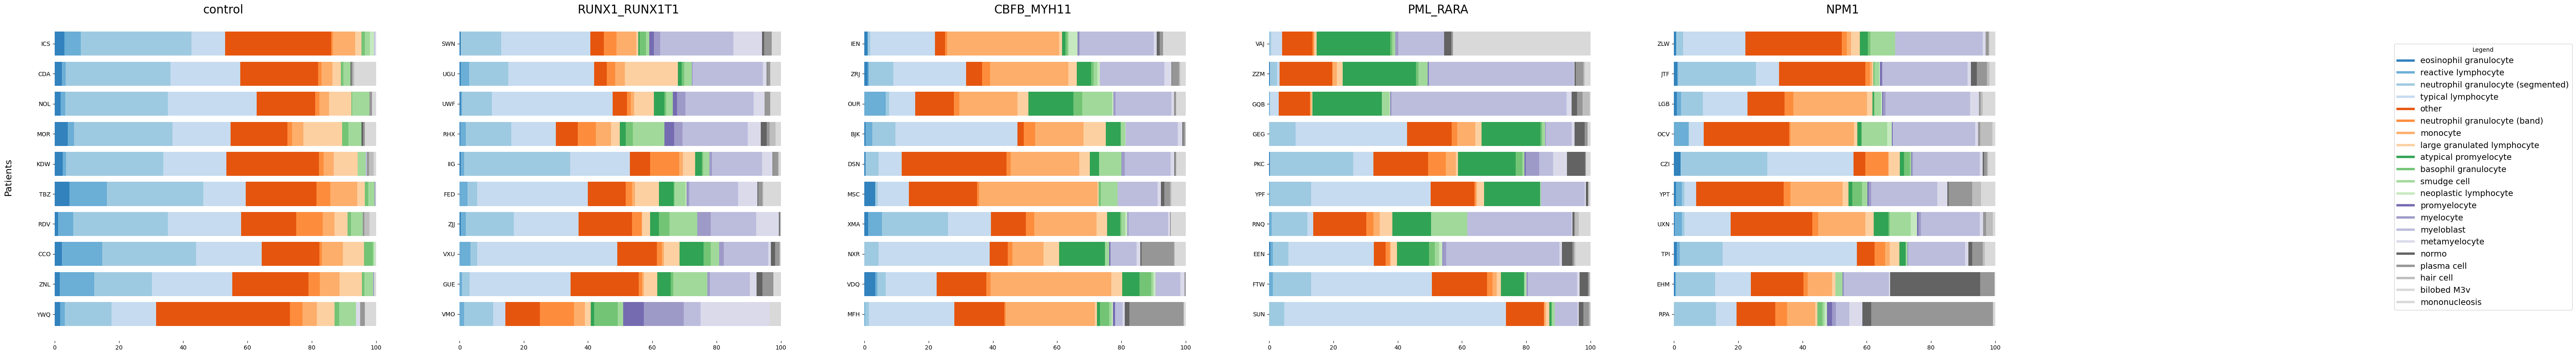

<Figure size 300x200 with 0 Axes>

In [16]:
data_path = '/mnt/volume/shared/data_file/data'
# Initialize figure for subplots
fig, axs = plt.subplots(nrows=1, ncols=len(os.listdir(data_path)), figsize=(12 * len(os.listdir(data_path)), 10), sharey=False)
figlegend = pylab.figure(figsize=(3,2))
# Initialize legend elements for the overall plot
legend_elements = []

# Iterate over all subfolders in the data folder
for i, class_folder in enumerate(os.listdir(data_path)):
    class_path = os.path.join(data_path, class_folder)
    axs[i].set_title(class_folder, fontsize=20)
    count=0
    if os.path.isdir(class_path):
        patient_data = get_sorted_patient_data(class_path)
        for patient_info in patient_data:
            if count < am_im:
                patient_folder = patient_info['patient_folder']
                sorted_labels = patient_info['sorted_labels']
                counts_percentages = patient_info['counts_percentages']
            
                # Create a horizontal stacked bar plot for each patient in the class
                left = 0
                for label in sorted_labels:
                    axs[i].barh(patient_folder, counts_percentages[label], label=cv[label], alpha=1, color=colors[label], left=left)
                    left += counts_percentages[label]
                count+=1    
                
        # Get rid of frame
        for spine in axs[i].spines.values():
            spine.set_visible(False)
        
# Add labels with increased font size
fig.text(0.105, 0.5, "Patients", va='center', rotation='vertical', fontsize=16)
legend_elements.extend([Line2D([0], [0], color=colors[color], lw=4, label=cv[color]) for color in range(len(colors))])
# Create a legend for the overall plot with increased font size
legend = fig.legend(handles=legend_elements, title="Legend", bbox_to_anchor=(1.05, 0.5), loc='center left', fontsize=14)
export_legend(legend)

# Show the plot
plt.show()
fig.savefig(image_path+'plot_train', bbox_inches='tight')

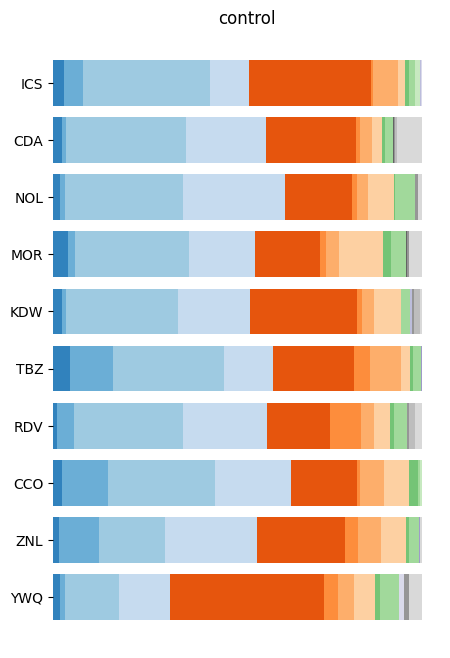

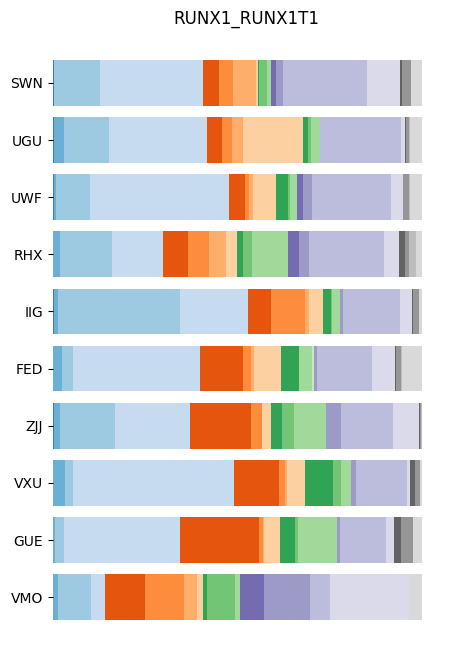

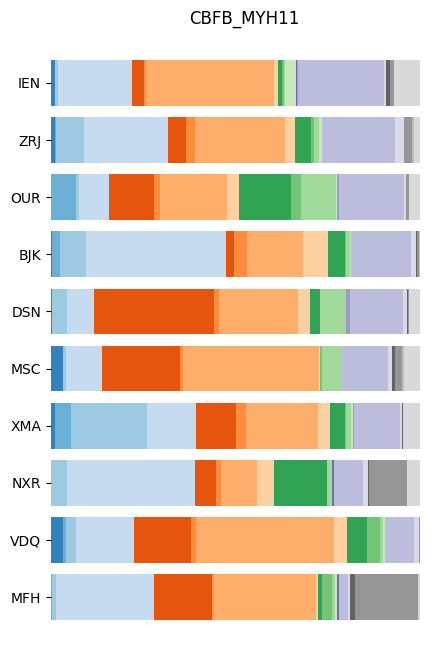

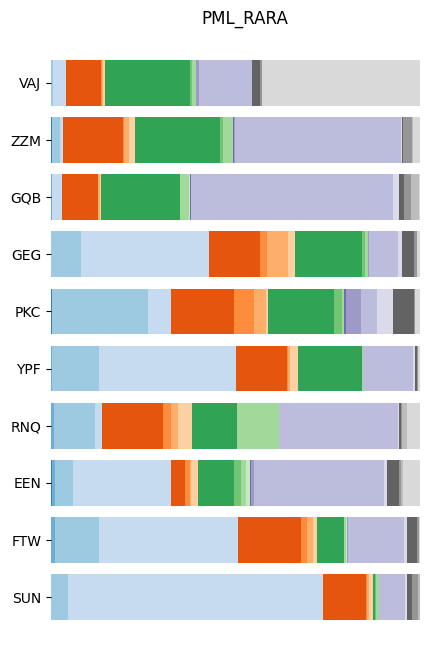

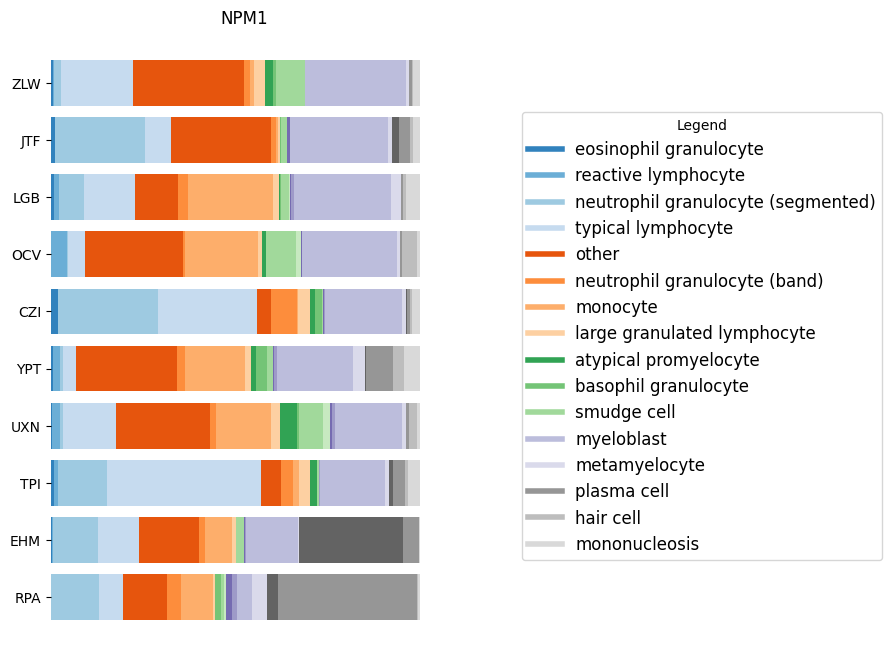

In [17]:
# Iterate over all subfolders in the data folder
for class_folder in os.listdir(data_path):
    class_path = os.path.join(data_path, class_folder)
    
    if os.path.isdir(class_path):
        #Store data for each patient in order to store it
        patient_data = get_sorted_patient_data(class_path)
        plot_sc_percentages_per_patient(patient_data,class_folder,image_path+f'plot_train_{class_folder}.png')

### Test data set

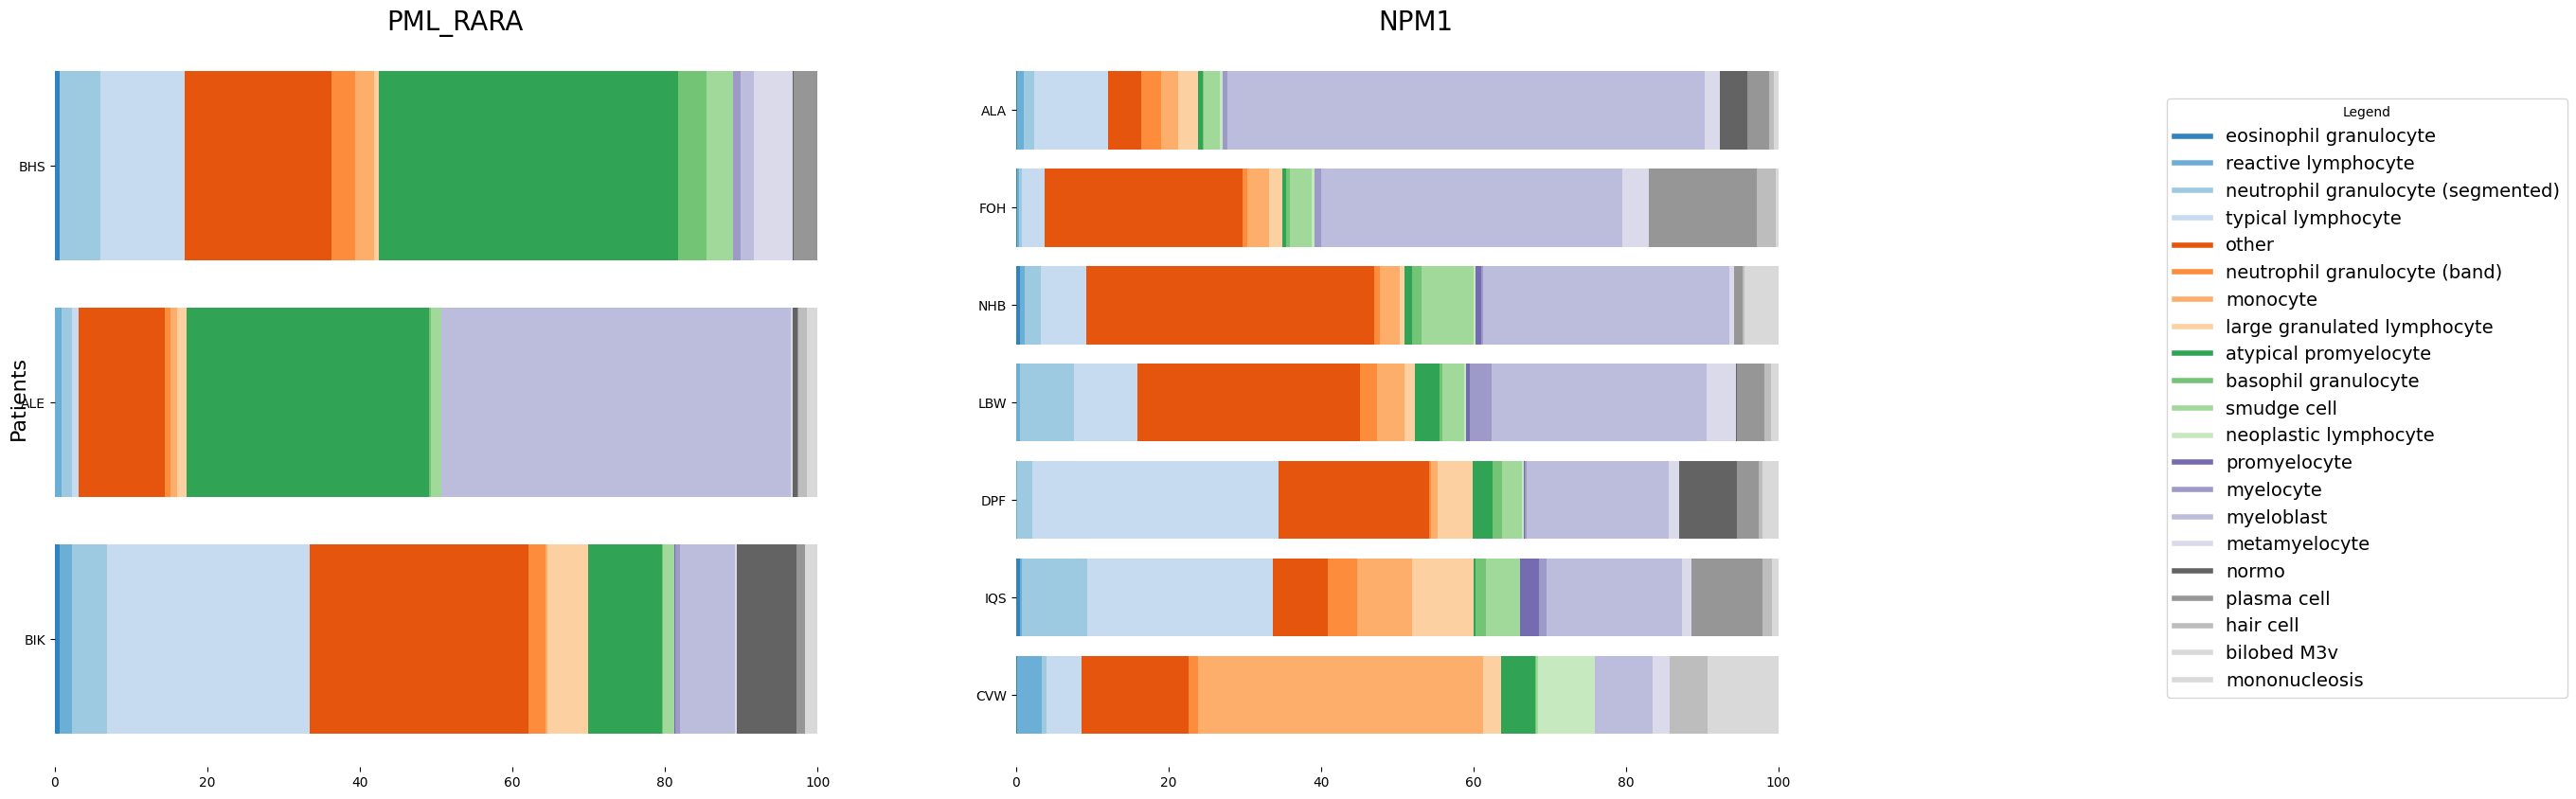

<Figure size 300x200 with 0 Axes>

In [20]:
data_path = '/mnt/volume/shared/data_file/test_data'
# Initialize figure for subplots
fig, axs = plt.subplots(nrows=1, ncols=len(os.listdir(data_path)), figsize=(12 * len(os.listdir(data_path)), 10), sharey=False)
figlegend = pylab.figure(figsize=(3,2))
# Initialize legend elements for the overall plot
legend_elements = []

# Iterate over all subfolders in the data folder
for i, class_folder in enumerate(os.listdir(data_path)):
    class_path = os.path.join(data_path, class_folder)
    
    # Ensure that the item is a directory
    if os.path.isdir(class_path):
        patient_data = get_sorted_patient_data(class_path)
        count=0
        for patient_info in patient_data:
            if count < am_im:
                patient_folder = patient_info['patient_folder']
                sorted_labels = patient_info['sorted_labels']
                counts_percentages = patient_info['counts_percentages']
                axs[i].set_title(class_folder, fontsize=20)
                # Create a horizontal stacked bar plot for each patient in the class
                left = 0
                for label in sorted_labels:
                    axs[i].barh(patient_folder, counts_percentages[label], label=cv[label], alpha=1, color=colors[label], left=left)
                    left += counts_percentages[label]
                count+=1     
                
        # Get rid of frame
        for spine in axs[i].spines.values():
            spine.set_visible(False)
        
# Add labels with increased font size
fig.text(0.105, 0.5, "Patients", va='center', rotation='vertical', fontsize=16)
legend_elements.extend([Line2D([0], [0], color=colors[color], lw=4, label=cv[color]) for color in range(len(colors))])
# Create a legend for the overall plot with increased font size
legend = fig.legend(handles=legend_elements, title="Legend", bbox_to_anchor=(1.05, 0.5), loc='center left', fontsize=14)
export_legend(legend)

# Show the plot
plt.show()
fig.savefig(image_path+'plot_test', bbox_inches='tight')

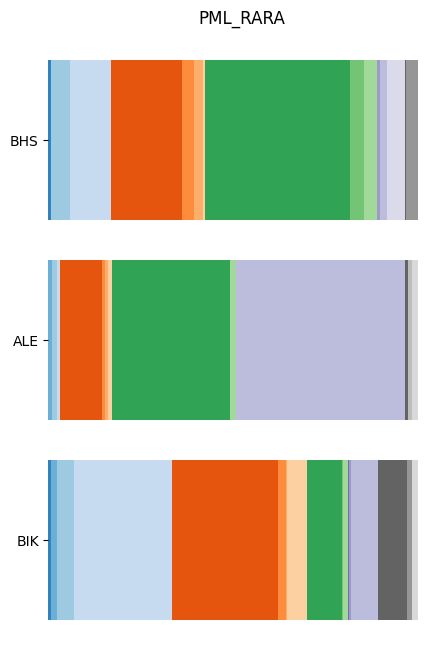

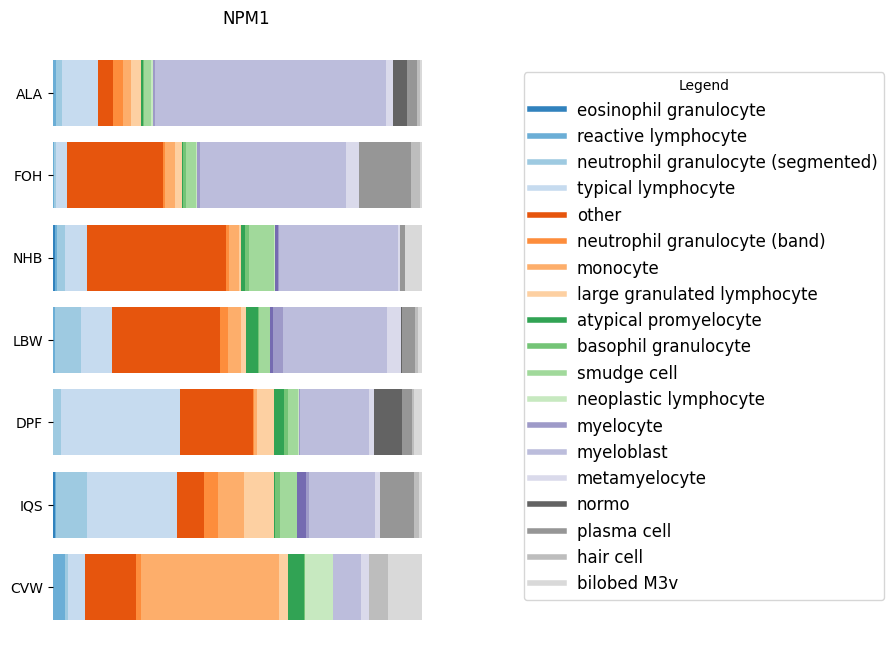

In [21]:
# Iterate over all subfolders in the data folder
for class_folder in os.listdir(data_path):
    class_path = os.path.join(data_path, class_folder)
    
    if os.path.isdir(class_path):
        #Store data for each patient in order to store it
        patient_data = get_sorted_patient_data(class_path)
        plot_sc_percentages_per_patient(patient_data,class_folder,image_path+f'plot_test_{class_folder}.png')

## Artificial patients

In [68]:
experiment_nr="3_seed42"
data_path = f'/mnt/volume/shared/data_file/artificialdata/experiment_{experiment_nr}/data'
data_path

'/mnt/volume/shared/data_file/artificialdata/experiment_3_seed42/data'

[{'patient_folder': 'patient_27', 'sorted_labels': array([ 1,  2,  3,  4,  5,  6,  7,  9, 10, 17, 20]), 'counts_percentages': array([ 0.        , 12.68656716,  7.8358209 , 47.76119403, 11.56716418,
        1.11940299,  1.49253731,  5.97014925,  0.        ,  2.23880597,
        2.98507463,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  2.98507463,  0.        ,  0.        ,
        3.35820896])}, {'patient_folder': 'patient_28', 'sorted_labels': array([ 0,  2,  3,  4,  5,  6,  7, 10, 11, 15, 20]), 'counts_percentages': array([ 1.93236715,  0.        , 11.5942029 , 51.20772947,  4.83091787,
        4.34782609,  3.38164251, 13.04347826,  0.        ,  0.        ,
        0.48309179,  0.96618357,  0.        ,  0.        ,  0.        ,
        0.96618357,  0.        ,  0.        ,  0.        ,  0.        ,
        7.24637681])}, {'patient_folder': 'patient_30', 'sorted_labels': array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 10, 13, 15, 17, 20]), 'counts_perc

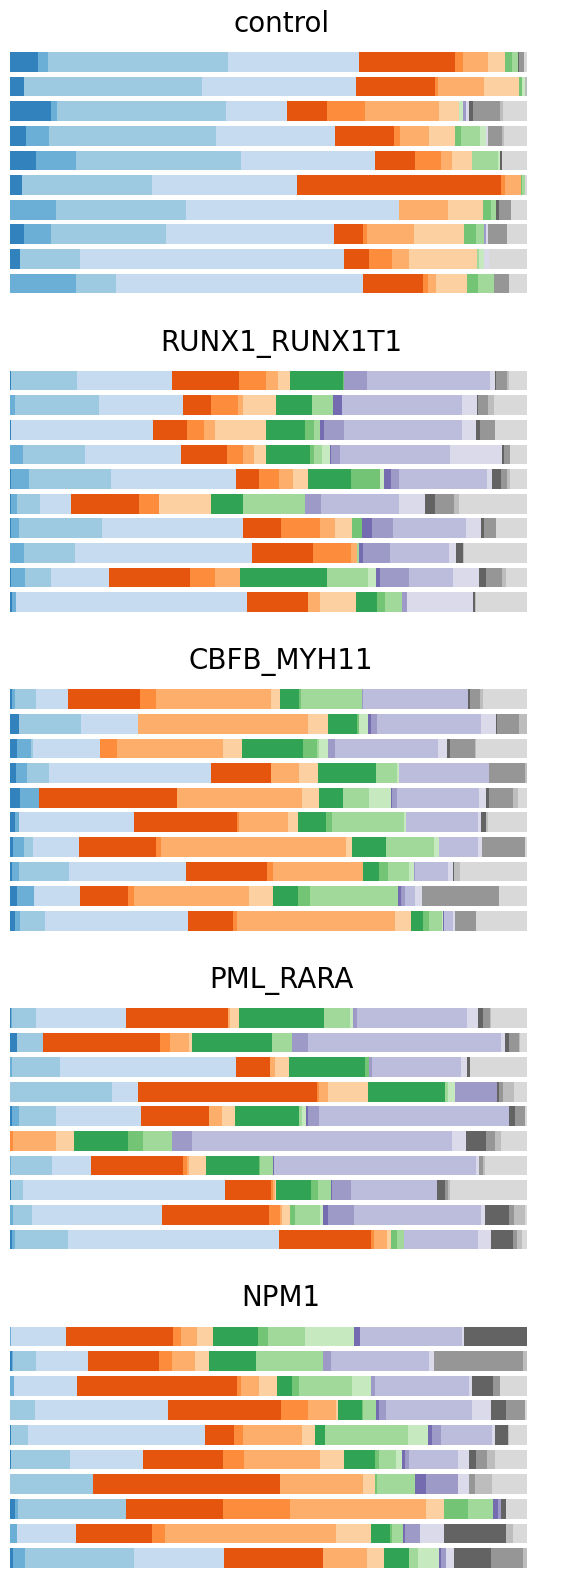

<Figure size 300x200 with 0 Axes>

In [75]:
# Initialize figure for subplots
fig, axs = plt.subplots(nrows=len(os.listdir(data_path)), ncols=1, figsize=(7,4*len(os.listdir(data_path)) ), sharey=False)
figlegend = pylab.figure(figsize=(3,2))
# Initialize legend elements for the overall plot
legend_elements = []

# Iterate over all subfolders in the data folder
for i, class_folder in enumerate(os.listdir(data_path)):
    class_path = os.path.join(data_path, class_folder)
    
    if os.path.isdir(class_path):
        patient_data = get_sorted_patient_data(class_path)
        print(patient_data)
        count=0
        for patient_info in patient_data:
            if count < am_im:
                patient_folder = patient_info['patient_folder']
                sorted_labels = patient_info['sorted_labels']
                counts_percentages = patient_info['counts_percentages']
                axs[i].set_title(class_folder, fontsize=20)
                # Create a horizontal stacked bar plot for each patient in the class
                left = 0
                for label in sorted_labels:
                    axs[i].barh(patient_folder, counts_percentages[label], label=cv[label], alpha=1, color=colors[label], left=left)
                    left += counts_percentages[label]
                count+=1        
                
        # Get rid of frame
        for spine in axs[i].spines.values():
            spine.set_visible(False)
        axs[i].set_xticks([])
        axs[i].set_yticks([])

plt.tight_layout()
#export_legend(legend,image_path+"legend_artificial.png")
plt.show()
fig.savefig(image_path+f'plot_experiment{experiment_nr}', bbox_inches='tight')

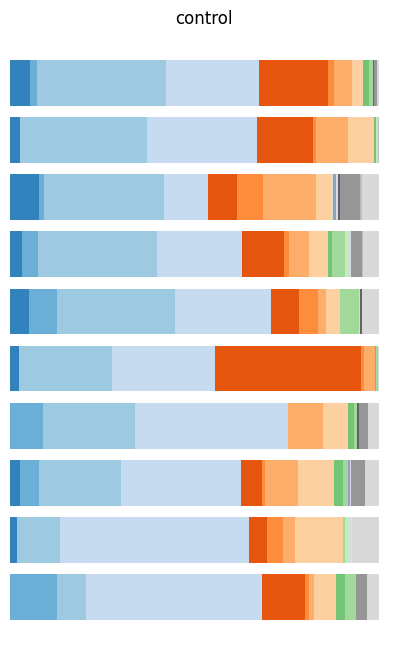

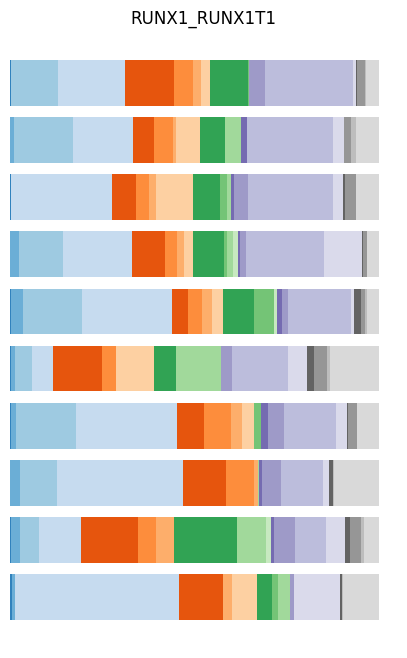

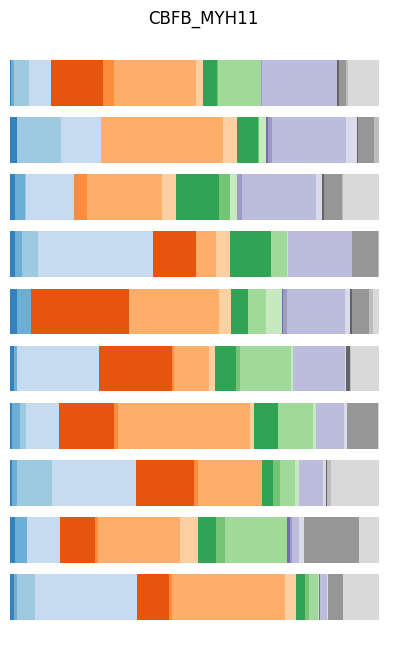

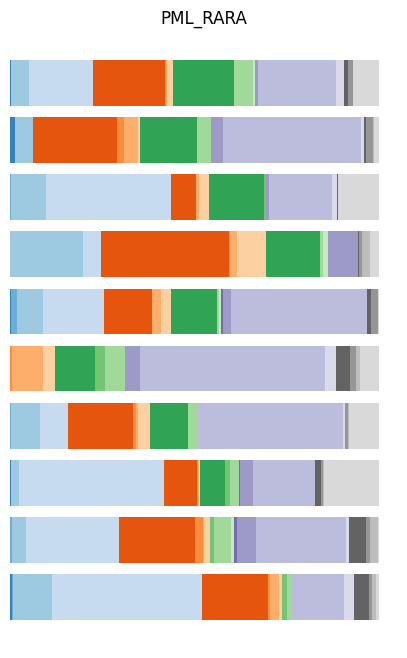

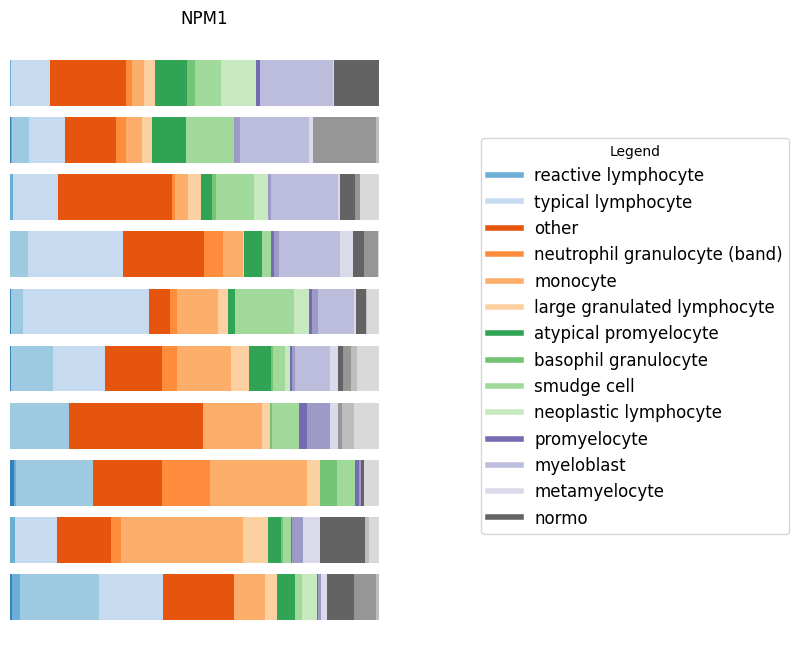

In [24]:
# Iterate over all subfolders in the data folder
for class_folder in os.listdir(data_path):
    class_path = os.path.join(data_path, class_folder)
    
    if os.path.isdir(class_path):
        #Store data for each patient in order to store it
        patient_data = get_sorted_patient_data(class_path)
        plot_sc_percentages_per_patient(patient_data,class_folder,image_path+f"plot_experiment{experiment_nr}_{class_folder}",disable_yticks=True)

## Mixed patients

In [96]:
import pickle
import re
#Function to sort patient data by maximum occuring single cell label
def get_mixed_patient_data(mixed_data_filepaths):
    total_counts =  np.zeros(len(colors)) # In order to get the maximum occuring single cell label
    patient_data = {}  # List to store data for each patient
    for class_name,file_paths in mixed_data_filepaths.items():
        for file_path in file_paths:
            #Get all artificial patients
            if "patient" in file_path:
                probs_path = file_path + '/single_cell_probabilities.npy'
                sc_probs = np.load(probs_path)
                sc_class = np.argmax(sc_probs, axis=1)
                counts_vector, unique_labels = get_counts_vector(sc_class)
                counts_percentages = counts_vector / np.sum(counts_vector) * 100    
                total_counts+=counts_vector
                patient_folder="patient_"+extract_patient_number(file_path)
                # Store data for each patient
                if class_name not in patient_data.keys():
                    patient_data[class_name] = []
                patient_data[class_name].append({'patient_folder': patient_folder, 'sorted_labels': unique_labels,'counts_percentages': counts_percentages})
    max_sc_class_index=np.argmax(total_counts)
    # Sort patient_data based on the label of maximum single cell class counts
    
    return patient_data

def extract_patient_number(file_path):
    # Define a regex pattern to match the patient number
    pattern = r'patient_(\d+)'

    # Use re.search to find the match in the file path
    match = re.search(pattern, file_path)

    # Check if a match is found
    if match:
        patient_number = match.group(1)
        return patient_number
    else:
        return None 

### Naive

In [109]:
seed=42
percentage=50
data_path=f"//mnt/volume/shared/data_file/mixed_seed{seed}/{percentage}_percent"

#Get file paths
with open(data_path+'/file_paths.pkl', 'rb') as f:
    mixed_data_filepaths = pickle.load(f)
mixed_data_filepaths    
class_names= ['control', 'RUNX1_RUNX1T1', 'CBFB_MYH11', 'PML_RARA', 'NPM1']

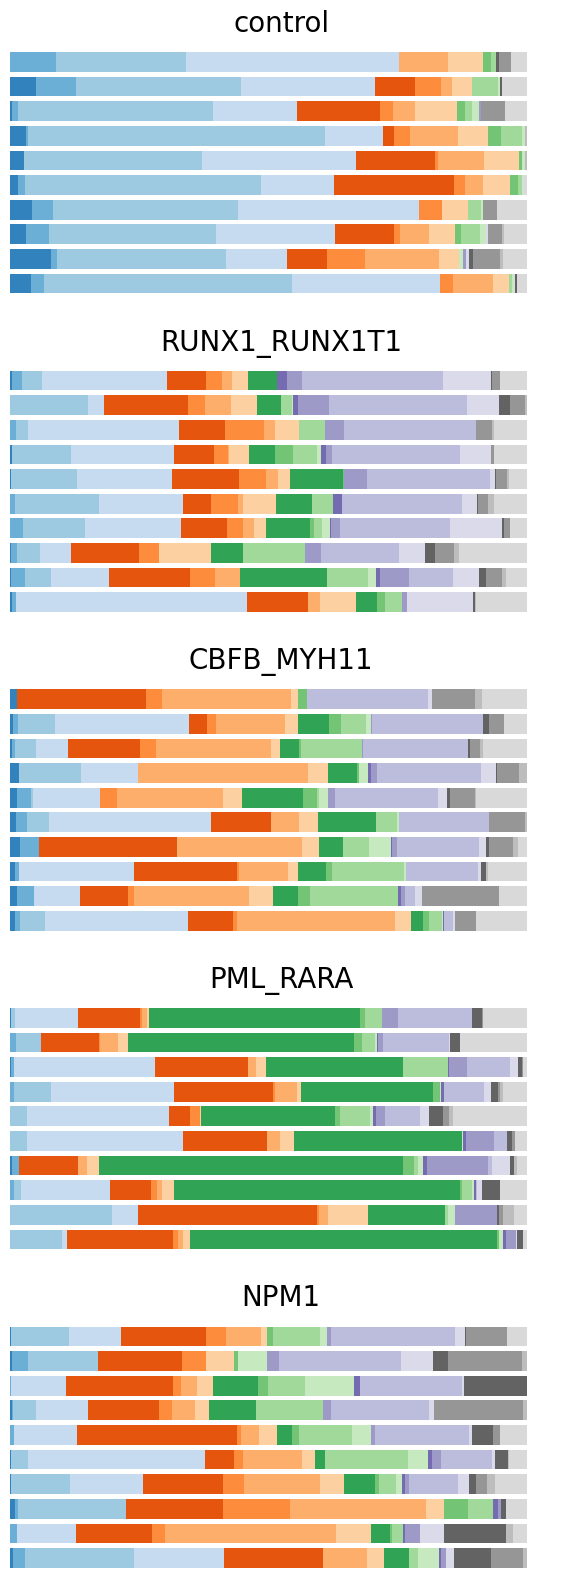

<Figure size 300x200 with 0 Axes>

In [110]:
# Initialize figure for subplots
fig, axs = plt.subplots(nrows=len(class_names), ncols=1, figsize=(7,4*len(class_names)), sharey=False)
figlegend = pylab.figure(figsize=(3,2))
# Initialize legend elements for the overall plot
legend_elements = []
all_data=get_mixed_patient_data(mixed_data_filepaths)

for i,class_name in enumerate(class_names):
    patient_data = all_data[class_name]
    #print(patient_data)
    count=0
    patient_data.sort(key=lambda x: np.max(x['counts_percentages'][max_sc_class_index]))
    for patient_info in patient_data:
        #print(patient_info)
        if count < am_im:
            patient_folder = patient_info['patient_folder']
            sorted_labels = patient_info['sorted_labels']
            counts_percentages = patient_info['counts_percentages']
            axs[i].set_title(class_name, fontsize=20)
            # Create a horizontal stacked bar plot for each patient in the class
            left = 0
            for label in sorted_labels:
                axs[i].barh(patient_folder, counts_percentages[label], label=cv[label], alpha=1, color=colors[label], left=left)
                left += counts_percentages[label]
            count+=1        
            
    # Get rid of frame
    for spine in axs[i].spines.values():
        spine.set_visible(False)
    axs[i].set_xticks([])
    axs[i].set_yticks([])

plt.tight_layout()
#export_legend(legend,image_path+"legend_artificial.png")
plt.show()
fig.savefig(image_path+f'plot_experiment_mixed_seed{seed}', bbox_inches='tight')

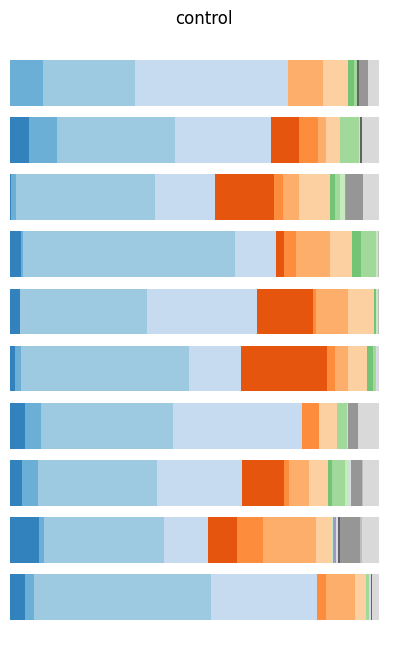

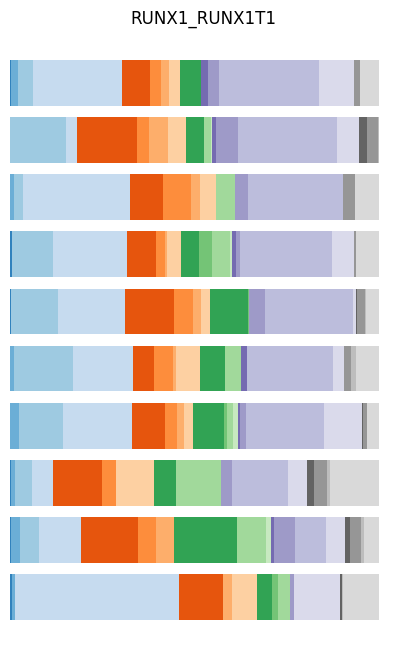

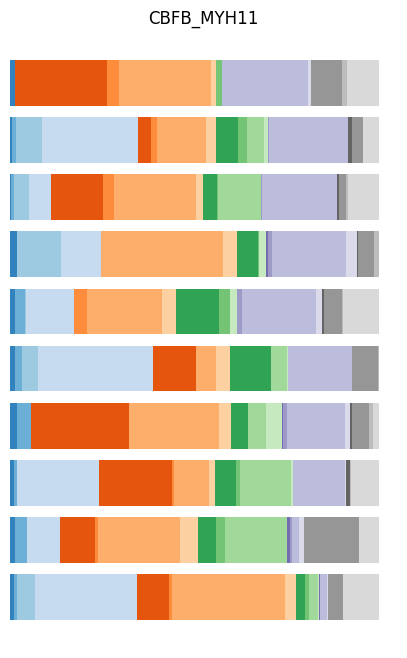

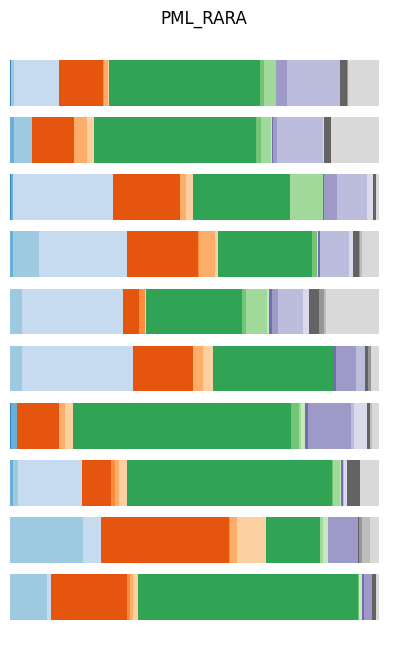

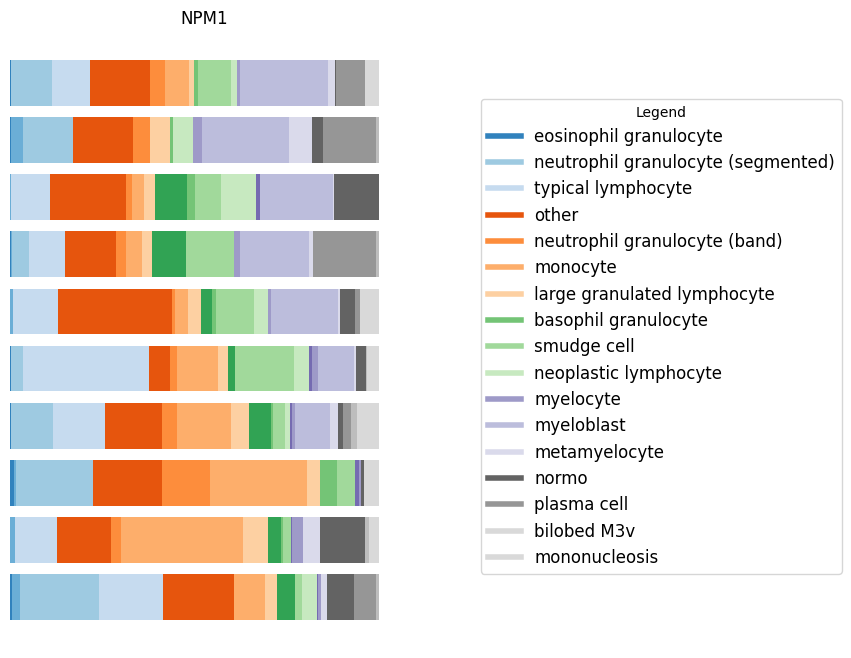

In [111]:
# Iterate over all subfolders in the data folder
all_data=get_mixed_patient_data(mixed_data_filepaths)
for class_folder in class_names:
    patient_data = all_data[class_folder]
    patient_data.sort(key=lambda x: np.max(x['counts_percentages'][max_sc_class_index]))
    plot_sc_percentages_per_patient(patient_data,class_folder,image_path+f"plot_experiment_mixed_seed{seed}_{class_folder}",disable_yticks=True)

### Uncertain

In [112]:
seed=42
percentage=50
data_path=f"//mnt/volume/shared/data_file/mixed_uncertain_seed{seed}/max_{percentage}_percent"

#Get file paths
with open(data_path+'/file_paths.pkl', 'rb') as f:
    mixed_data_filepaths = pickle.load(f)
mixed_data_filepaths    
class_names= ['control', 'RUNX1_RUNX1T1', 'CBFB_MYH11', 'PML_RARA', 'NPM1']

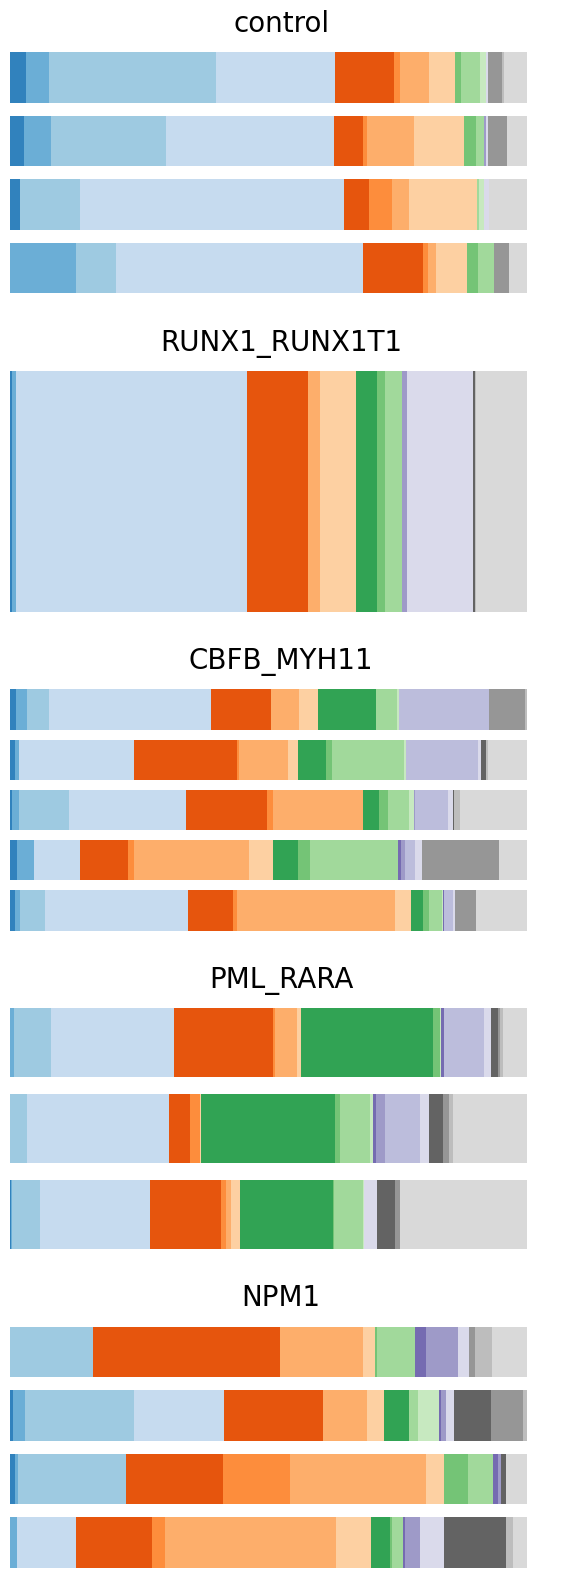

<Figure size 300x200 with 0 Axes>

In [113]:
# Initialize figure for subplots
fig, axs = plt.subplots(nrows=len(class_names), ncols=1, figsize=(7,4*len(class_names)), sharey=False)
figlegend = pylab.figure(figsize=(3,2))
# Initialize legend elements for the overall plot
legend_elements = []
all_data=get_mixed_patient_data(mixed_data_filepaths)

for i,class_name in enumerate(class_names):
    patient_data = all_data[class_name]
    #print(patient_data)
    count=0
    patient_data.sort(key=lambda x: np.max(x['counts_percentages'][max_sc_class_index]))
    for patient_info in patient_data:
        #print(patient_info)
        if count < am_im:
            patient_folder = patient_info['patient_folder']
            sorted_labels = patient_info['sorted_labels']
            counts_percentages = patient_info['counts_percentages']
            axs[i].set_title(class_name, fontsize=20)
            # Create a horizontal stacked bar plot for each patient in the class
            left = 0
            for label in sorted_labels:
                axs[i].barh(patient_folder, counts_percentages[label], label=cv[label], alpha=1, color=colors[label], left=left)
                left += counts_percentages[label]
            count+=1        
            
    # Get rid of frame
    for spine in axs[i].spines.values():
        spine.set_visible(False)
    axs[i].set_xticks([])
    axs[i].set_yticks([])

plt.tight_layout()
#export_legend(legend,image_path+"legend_artificial.png")
plt.show()
fig.savefig(image_path+f'plot_experiment_mixed_uncertain_seed{seed}', bbox_inches='tight')

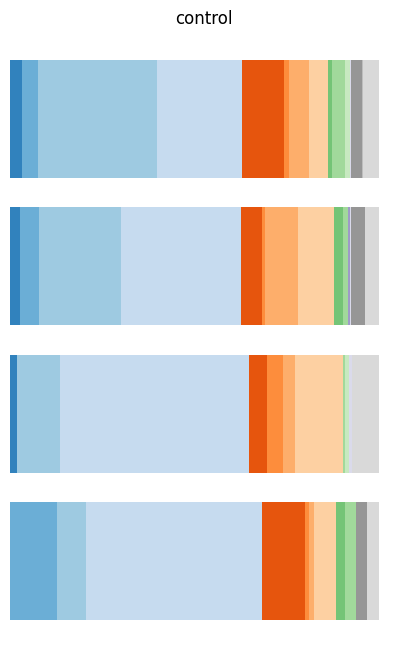

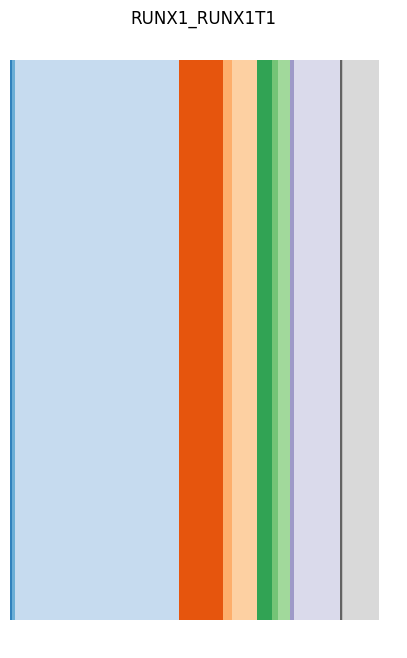

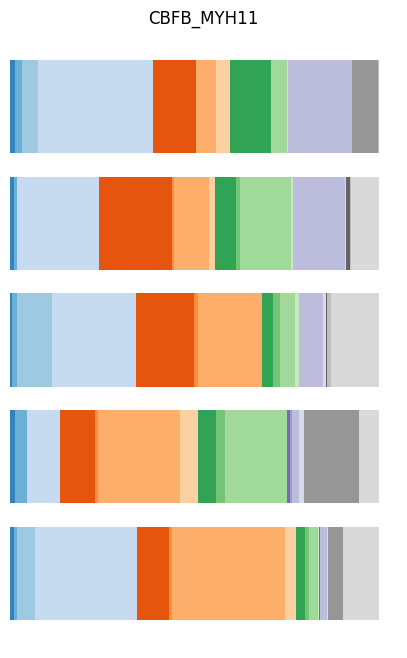

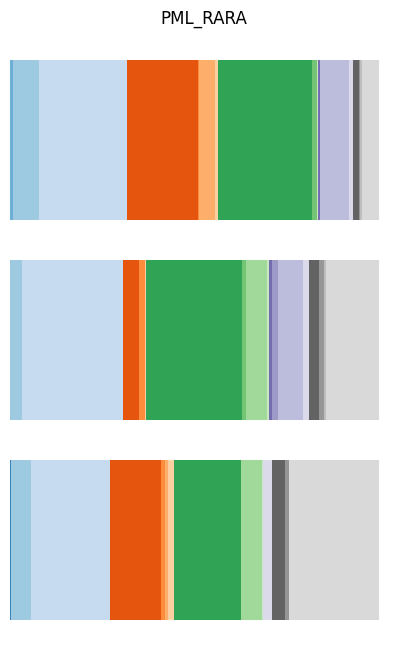

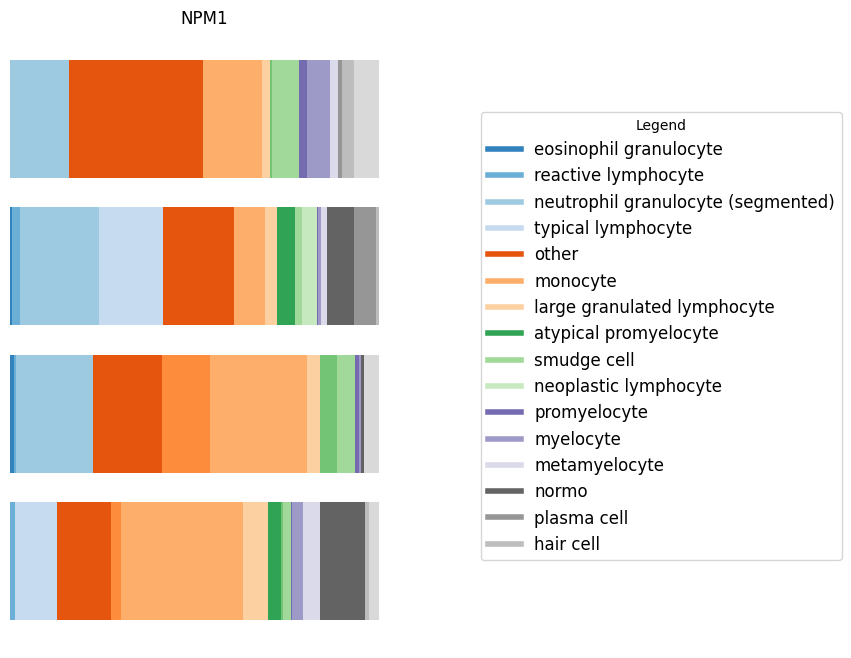

In [114]:
# Iterate over all subfolders in the data folder
all_data=get_mixed_patient_data(mixed_data_filepaths)
for class_folder in class_names:
    patient_data = all_data[class_folder]
    patient_data.sort(key=lambda x: np.max(x['counts_percentages'][max_sc_class_index]))
    plot_sc_percentages_per_patient(patient_data,class_folder,image_path+f"plot_experiment_mixed_uncertain_seed{seed}_{class_folder}",disable_yticks=True)

In [106]:
am_im

10

In [108]:
all_data["control"]

[{'patient_folder': 'patient_27',
  'sorted_labels': array([ 1,  2,  3,  4,  5,  6,  7,  9, 10, 17, 20]),
  'counts_percentages': array([ 0.        , 12.68656716,  7.8358209 , 47.76119403, 11.56716418,
          1.11940299,  1.49253731,  5.97014925,  0.        ,  2.23880597,
          2.98507463,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  2.98507463,  0.        ,  0.        ,
          3.35820896])},
 {'patient_folder': 'patient_28',
  'sorted_labels': array([ 0,  2,  3,  4,  5,  6,  7, 10, 11, 15, 20]),
  'counts_percentages': array([ 1.93236715,  0.        , 11.5942029 , 51.20772947,  4.83091787,
          4.34782609,  3.38164251, 13.04347826,  0.        ,  0.        ,
          0.48309179,  0.96618357,  0.        ,  0.        ,  0.        ,
          0.96618357,  0.        ,  0.        ,  0.        ,  0.        ,
          7.24637681])},
 {'patient_folder': 'patient_27',
  'sorted_labels': array([ 1,  2,  3,  4,  5,  6,  7,  9, 10, 17, 20